In [1]:
import numpy as np
import sys
from mpi4py import MPI # needed for STKFMM
import PySTKFMM
import timer
import matplotlib.pyplot as plt

### Single stokeslet

In [2]:
# FMM parameters
mult_order = 10
max_pts = 128
pbc = PySTKFMM.PAXIS.NONE
kernel = PySTKFMM.KERNEL.Stokes

In [4]:
# Create sources and targets coordinates
ntrg = 10

src_coord = np.array([[0, 0, 1.]]) # be careful not to set it with integer array
nsrc = len(src_coord)
                         
trg_coord = np.array([src_coord[0] for i in range(ntrg)])
for i in range(ntrg):
    trg_coord[i, 0] += i * 0.1

myFMM = PySTKFMM.Stk3DFMM(mult_order, max_pts, pbc, kernel)
myFMM.showActiveKernels()
kdimSL, kdimDL, kdimTrg = myFMM.getKernelDimension(kernel)

# Create sources and target values
src_value = np.array([[1.,0,0]]) # unit force pointing in x-direction
trg_value = np.zeros((ntrg, kdimTrg)) # target values = velocities
### No double layer sources
nsrc_DL = 0
src_DL_coord = None
src_DL_value = None
###

# Set tree
myFMM.setBox([-2.0, -2.0, -2.0], 4)
myFMM.setPoints(nsrc, src_coord, ntrg, trg_coord, 0, None)
myFMM.setupTree(kernel)

# Evaluate FMM
myFMM.evaluateFMM(kernel, nsrc, src_value, ntrg, trg_value, nsrc_DL, src_DL_value)

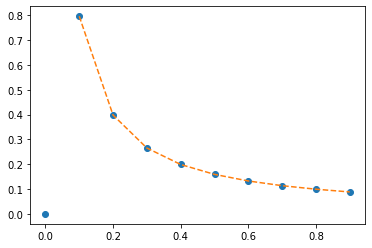

In [5]:
trg_abs = np.linalg.norm(trg_value, axis=1)

xs = trg_coord[:,0]
ys = trg_abs

xs_slope = xs[1:]
ys_slope = ys[1] * xs[1] * xs[1:] ** -1 # ~ 1/r

plt.plot(xs, ys, 'o')
plt.plot(xs_slope, ys_slope,'--')
#plt.yscale('log')
#plt.xscale('log')

- OK: Single stokeslet -> fluid velocity scales exactly as inverse distance to the stokeslet.
- Velocity in the singularity is equal to zero.
- TODO: check exact values

### Two stokeslets

In [6]:
# Create sources and targets coordinates
ntrg = 30

src_coord = np.array([[-1, 0, 1.], [1, 0, 1.]]) # be careful not to set it with integer array
nsrc = len(src_coord)

trg_coord = np.array([[0,0,1.] for i in range(ntrg)])
for i in range(ntrg):
    trg_coord[i,0] += - 1.5 +  i * 0.1

#
myFMM = PySTKFMM.Stk3DFMM(mult_order, max_pts, pbc, kernel)
myFMM.showActiveKernels()
kdimSL, kdimDL, kdimTrg = myFMM.getKernelDimension(kernel)

# Create sources and target values
src_value = np.array([[1.,0,0], [-1.,0,0]])
trg_value = np.zeros((ntrg, kdimTrg))
###

# Set tree
myFMM.setBox([-2.0, -2.0, -2.0], 4)
myFMM.setPoints(nsrc, src_coord, ntrg, trg_coord, 0, None)
myFMM.setupTree(kernel)

# Evaluate FMM
myFMM.evaluateFMM(kernel, nsrc, src_value, ntrg, trg_value, 0, None)

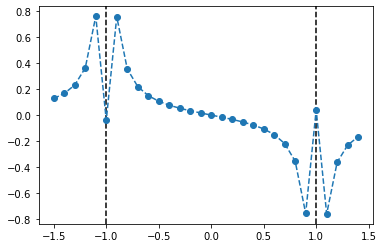

In [7]:
trg_abs = np.linalg.norm(trg_value, axis=1)

xs = trg_coord[:,0]
ys = trg_value[:,0]

for c in src_coord:
    plt.axvline(x=c[0], linestyle='--', color='black')

plt.plot(xs, ys, '--o')

- OK: symmetry
- In points with singularity always zero velocity!